In [1]:
import os
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
from IPython import display
import sklearn
import random
import time
import warnings 
warnings.filterwarnings('ignore')
print('-'*25)

from subprocess import check_output
print(check_output(['ls', '/data/datasets/titanic_data']).decode('utf8'))

-------------------------
test.csv
titanic_data.zip
train.csv



In [2]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab 
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12, 8

In [3]:
root_dir = '/data/datasets/titanic_data'

data_raw = pd.read_csv(os.path.join(root_dir, 'train.csv'))
data_val = pd.read_csv(os.path.join(root_dir, 'test.csv'))

data1 = data_raw.copy(deep=True)

data_cleaner = [data1, data_val]

print(data_raw.info())
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
397,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S


In [4]:
print('Train columns with null values:\n', data1.isnull().sum())
print('-'*10)
print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print('-'*10)
data_raw.describe(include='all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
for dataset in data_cleaner:
    ### complete missing data with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    
    ### complete embarked with mode(the maximum count of unique vlaues)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    
    ### complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

drop_column = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace=True)

print(data1.isnull().sum())
print('-'*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [6]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    
    dataset['Title'] = dataset['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    
stat_min = 10
title_names = (data1['Title'].value_counts() < stat_min)
data1['Title'] = data1['Title'].apply(lambda x : 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print('-'*10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------


In [7]:
print(data1.info())
print(data_val.info())
data1.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-nu

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
124,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,77.2875,S,2,0,Mr,"(31.0, 512.329]","(48.0, 64.0]"
732,0,2,"Knight, Mr. Robert J",male,28.0,0,0,0.0000,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
686,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,39.6875,S,6,0,Mr,"(31.0, 512.329]","(-0.08, 16.0]"
398,0,2,"Pain, Dr. Alfred",male,23.0,0,0,10.5000,S,1,1,Misc,"(7.91, 14.454]","(16.0, 32.0]"
647,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,35.5000,C,1,1,Misc,"(31.0, 512.329]","(48.0, 64.0]"
432,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,26.0000,S,2,0,Mrs,"(14.454, 31.0]","(32.0, 48.0]"
873,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,9.0000,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,10.5000,S,1,1,Mr,"(7.91, 14.454]","(64.0, 80.0]"
536,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,26.5500,S,1,1,Misc,"(14.454, 31.0]","(32.0, 48.0]"
588,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"


In [8]:
label = LabelEncoder()
### list = [list1, list2], list1, list2 changed while list changed
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    
Target = ['Survived']
data1_x = ['Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 
           'Age', 'Fare', 'FamilySize', 'IsAlone']
data1_x_calc = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'SibSp', 'Parch', 'Age', 'Fare']
data1_xy = Target + data1_x
print('Original X Y: ', data1_xy, '\n')

data1_x_bin = ['Sex_Code', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

### pd.get_dummies  change category to onehotlabel
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

data1_dummy.head()


Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [9]:
print('Train columns with null values: \n', data1.isnull().sum())
print('-'*10)
print(data1.info())
print('-'*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print('-'*10)
print(data_val.info())
print('-'*10)
data_raw.describe(include='all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null catego

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(
    data1[data1_x_calc], data1[Target], random_state=0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(
    data1[data1_x_bin], data1[Target], random_state=0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(
    data1_dummy[data1_x_dummy], data1[Target], random_state=0)

print('Data1 Shape: {}'.format(data1.shape))
print('Train1 Shape: {}'.format(train1_x.shape))
print('Test1 Shape: {}'.format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,2,3,1,1,0
68,0,2,2,7,1,1
253,1,2,3,2,1,2
320,1,2,3,1,1,0
706,0,2,4,1,2,1


In [11]:
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Correction by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

### show distributions of all index
print(pd.crosstab(data1['Title'], data1[Target[0]]))

Survival Correction by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correction by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correction by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correction by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correction by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correction by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correction by: FamilySize
   FamilySize  Survived
0           1  0.303538
1        

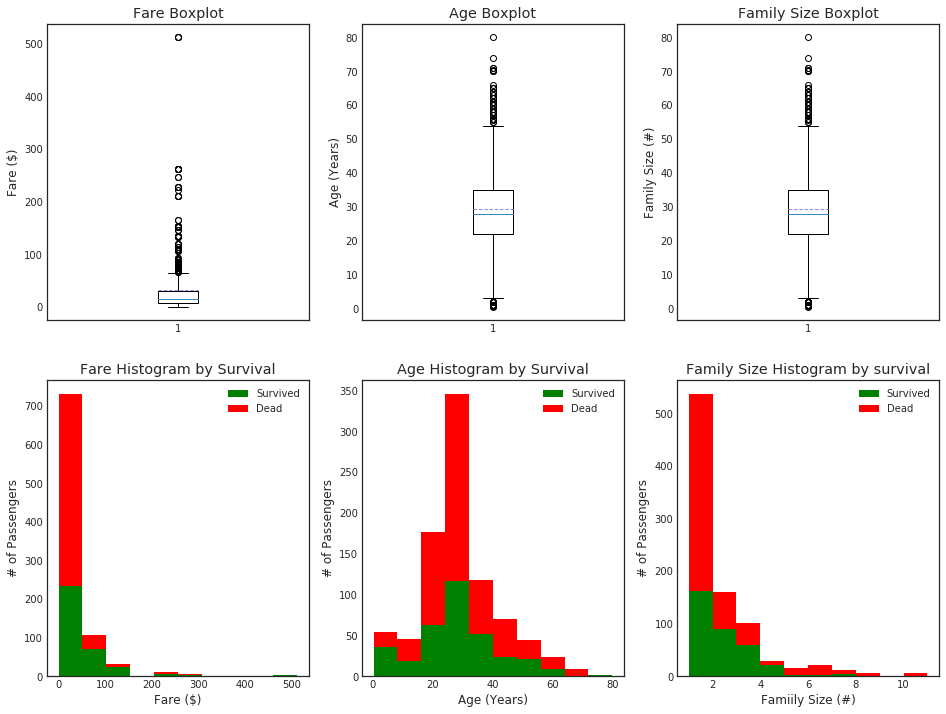

In [12]:
plt.figure(figsize=[16, 12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans=True, meanline=True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['Age'], showmeans=True, meanline=True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x=[data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x=[data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x=[data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Family Size Histogram by survival')
plt.xlabel('Famiily Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

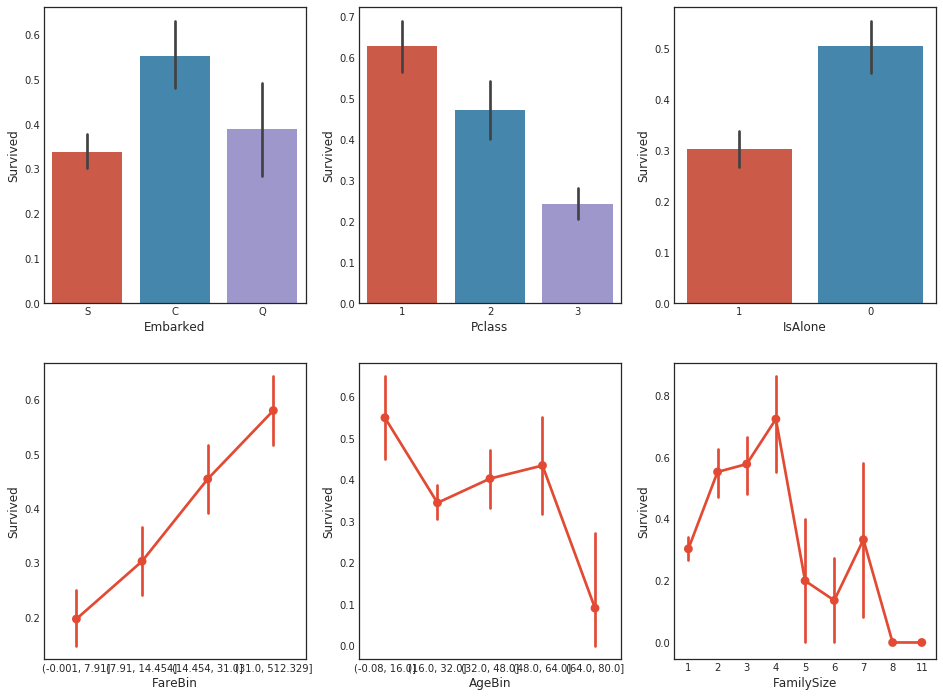

In [13]:
fig, saxis = plt.subplots(2, 3, figsize=(16, 12))

sns.barplot(x='Embarked', y='Survived', data=data1, ax=saxis[0, 0])
sns.barplot(x='Pclass', y='Survived', order=[1, 2, 3], data=data1, ax=saxis[0, 1])
sns.barplot(x='IsAlone', y='Survived', order=[1, 0], data=data1, ax=saxis[0, 2])

sns.pointplot(x='FareBin', y='Survived', data=data1, ax=saxis[1, 0])
sns.pointplot(x='AgeBin', y='Survived', data=data1, ax=saxis[1, 1])
sns.pointplot(x='FamilySize', y='Survived', data=data1, ax=saxis[1, 2])

Text(0.5,1,'Pclass vs Family Size Survival Comparison')

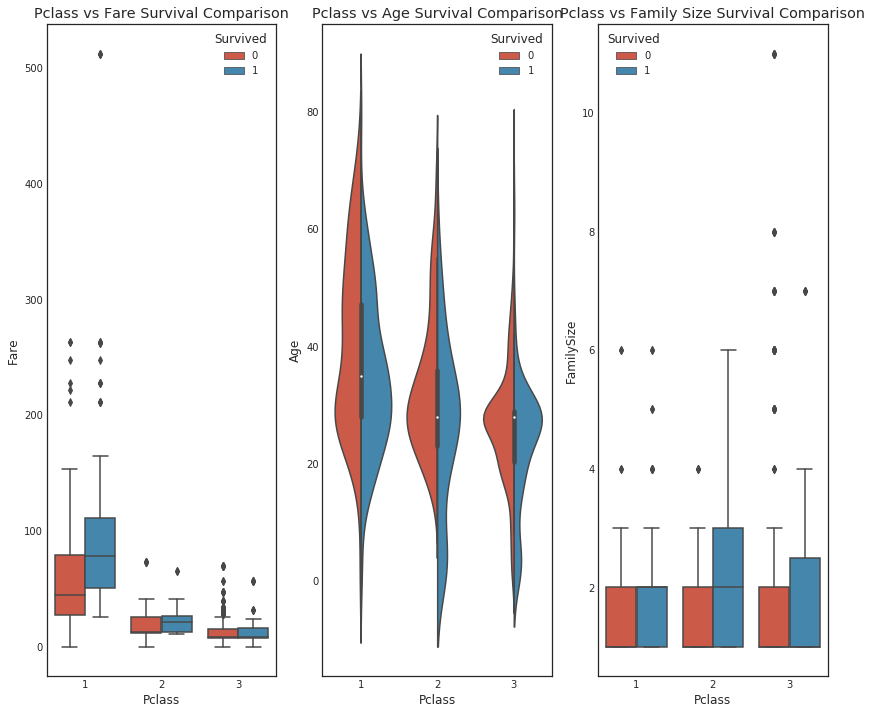

In [14]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(14, 12))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data1, ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data1, split=True, ax=axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x='Pclass', y='FamilySize', hue='Survived', data=data1, ax=axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5,1,'Sex vs IsAlone Survival Comparison')

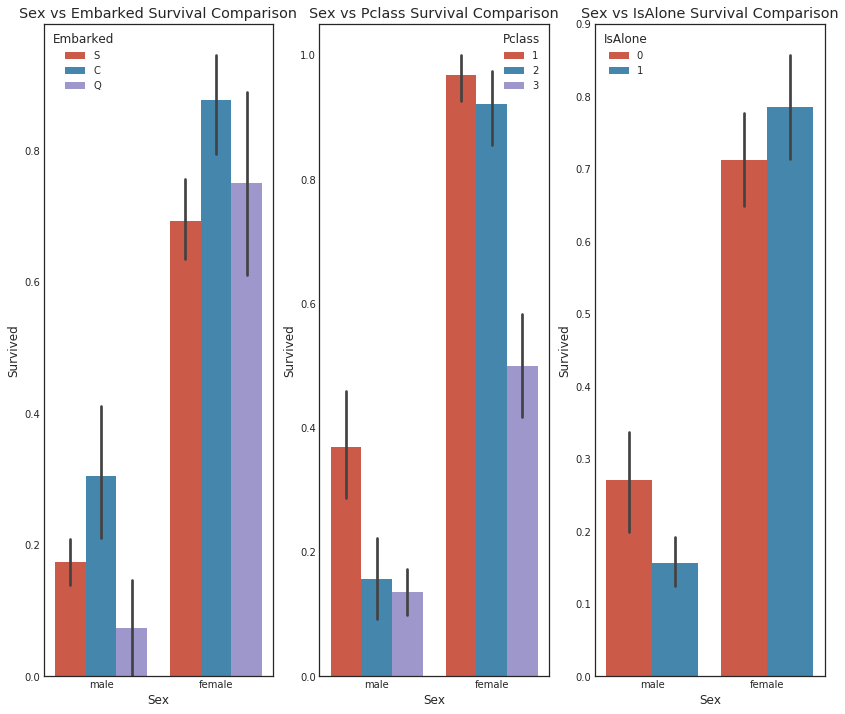

In [15]:
fig, qaxis = plt.subplots(1, 3, figsize=(14, 12))

sns.barplot(x='Sex', y='Survived', hue='Embarked', data=data1, ax=qaxis[0])
qaxis[0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x='Sex', y='Survived', hue='Pclass', data=data1, ax=qaxis[1])
qaxis[1].set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x='Sex', y='Survived', hue='IsAlone', data=data1, ax=qaxis[2])
qaxis[2].set_title('Sex vs IsAlone Survival Comparison')

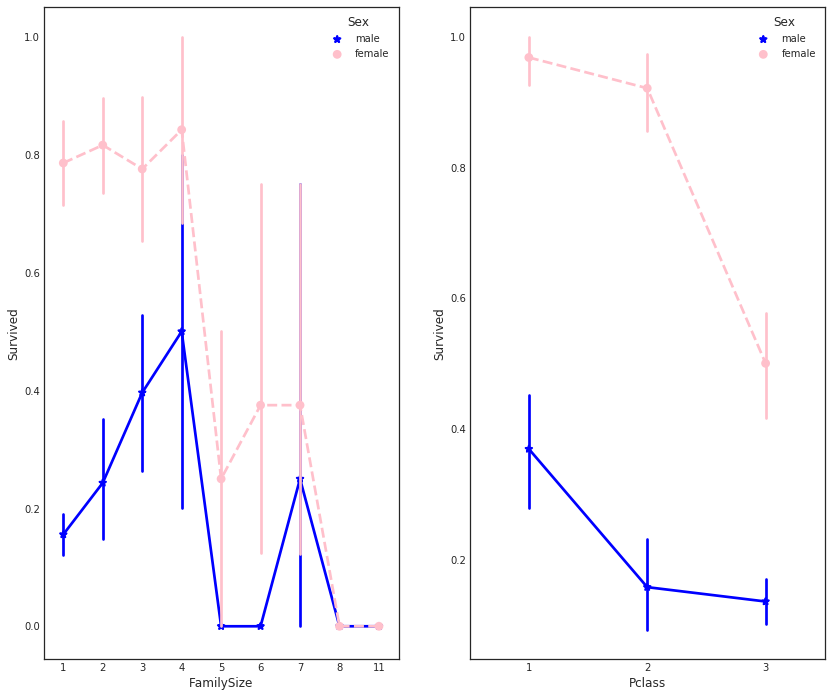

In [16]:
fig, (maxis1, maxis2) = plt.subplots(1, 2, figsize=(14, 12))

sns.pointplot(x='FamilySize', y='Survived', hue='Sex', data=data1, 
              palette={'male': 'blue', 'female': 'pink'}, 
              markers=['*', 'o'], linestyles=['-', '--'], ax=maxis1)

sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=data1, 
              palette={'male': 'blue', 'female': 'pink'}, 
              markers=['*', 'o'], linestyles=['-', '--'], ax=maxis2)

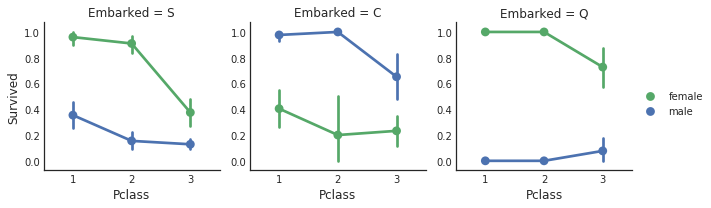

In [17]:
e = sns.FacetGrid(data1, col='Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95, palette='deep')
e.add_legend()

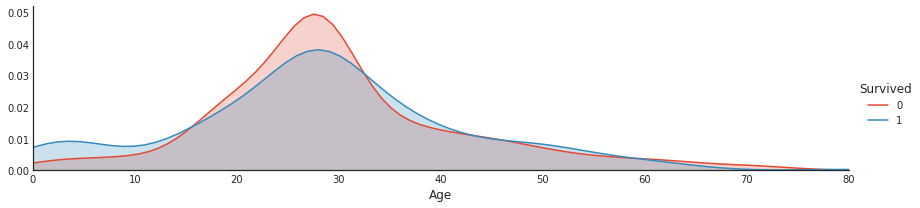

In [18]:
a = sns.FacetGrid(data1, hue='Survived', aspect=4)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=(0, data1['Age'].max()))
a.add_legend()

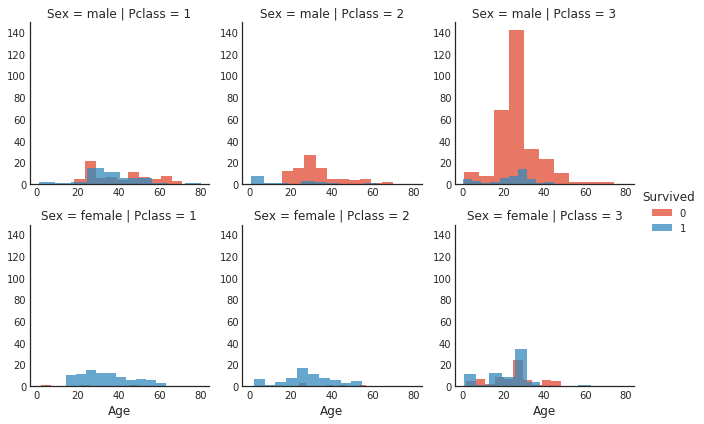

In [19]:
h = sns.FacetGrid(data1, row='Sex', col='Pclass', hue='Survived')
h.map(plt.hist, 'Age', alpha=.75)

h.add_legend()

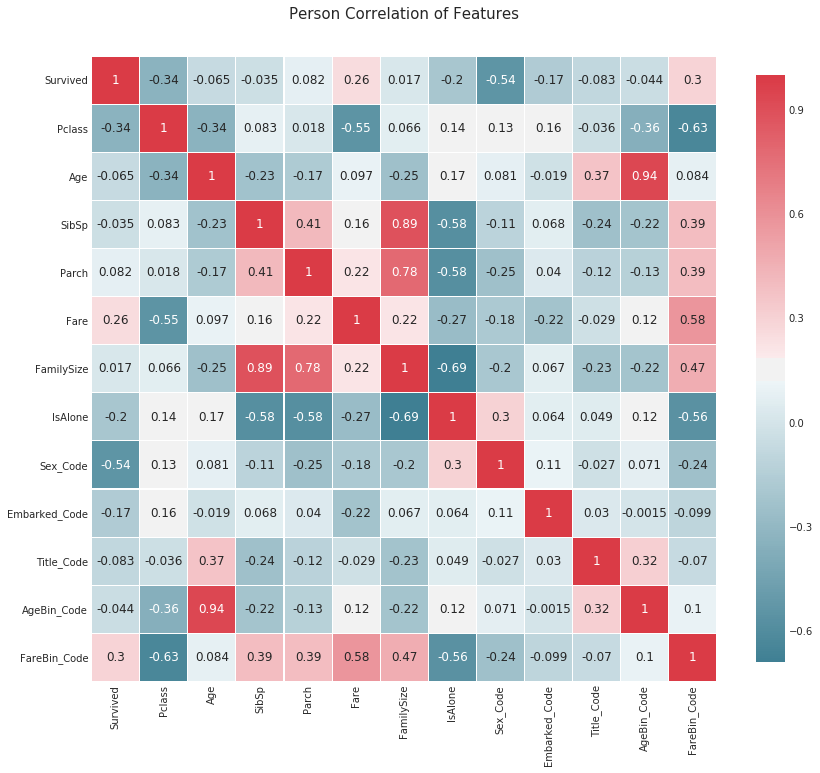

In [20]:
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap=colormap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=ax,
        annot=True,
        linewidths=0.1, vmax=1.0, linecolor='white',
        annot_kws={'fontsize': 12})
    
    plt.title('Person Correlation of Features', y=1.05, size=15)
    
correlation_heatmap(data1)

In [24]:
MLA = [
    ### Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    ### Gussian Process
    gaussian_process.GaussianProcessClassifier(),
    
    ### GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    ### Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    ### Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    ### SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    ### Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    ### Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(), 
    
    ### xgboost
    XGBClassifier()
]

cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.3, train_size=.6, random_state=0)
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 
               'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns=MLA_columns)
MLA_predict = data1[Target]

row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv=cv_split)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict['MLA_name'] = alg.predict(data1[data1_x_bin])
    
    row_index += 1
    
MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending=False, inplace=True)
MLA_compare
    

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
15,NuSVC,"{'cache_size': 200, 'kernel': 'rbf', 'verbose'...",0.830899,0.822761,0.0451246,0.0636808
14,SVC,"{'cache_size': 200, 'kernel': 'rbf', 'verbose'...",0.833333,0.821269,0.0417194,0.0531669
21,XGBClassifier,"{'nthread': None, 'objective': 'binary:logisti...",0.840449,0.81903,0.0539757,0.0221289
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'random_state': None,...",0.822097,0.81306,0.0645867,0.0871639
3,GradientBoostingClassifier,"{'loss': 'deviance', 'random_state': None, 'mi...",0.851873,0.811194,0.0491008,0.0907352
5,GaussianProcessClassifier,"{'kernel': None, 'random_state': None, 'n_jobs...",0.851311,0.801493,0.0522175,0.118417
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'tol': 0.0001, 'reg_param': 0...",0.817041,0.801119,0.0706289,0.00206499
19,LinearDiscriminantAnalysis,"{'tol': 0.0001, 'solver': 'svd', 'priors': Non...",0.796816,0.792537,0.0388418,0.00261757
8,RidgeClassifierCV,"{'fit_intercept': True, 'scoring': None, 'norm...",0.797566,0.792164,0.0381419,0.00334053
12,GaussianNB,{'priors': None},0.802434,0.791791,0.0640705,0.00210381


Text(0,0.5,'Algorithm')

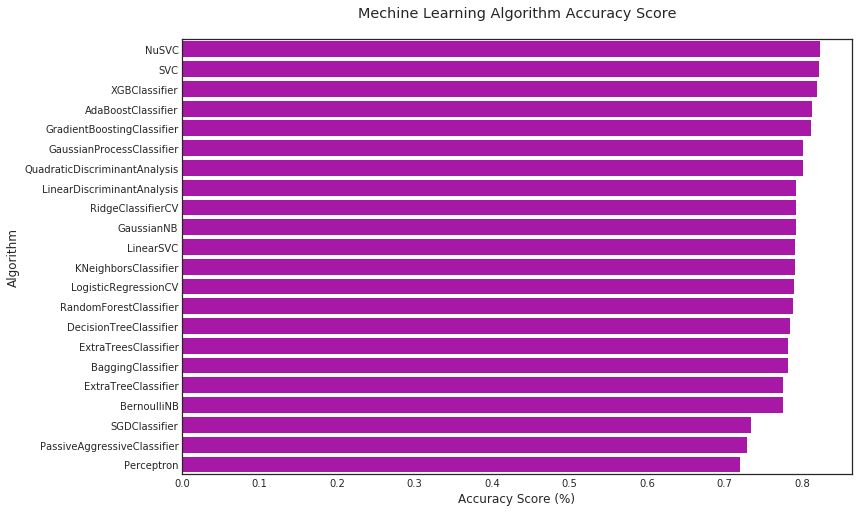

In [25]:
sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', data=MLA_compare, color='m')

plt.title('Mechine Learning Algorithm Accuracy Score\n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')